In [1]:
import pandas as pd

# Load the dataset from CSV file
 # Load the dataset
df = pd.read_csv('Phising_dataset_predict.csv')
df.head()  #  first few rows of the DataFrame


,Unnamed: 0,NumDots,UrlLength,AtSymbol,NumDash,NumPercent,NumQueryComponents,IpAddress,HttpsInHostname,PathLevel,PathLength,NumNumericChars,Phising
0,0,3,72,0,0,0,0,0,0,5,44,0,1.0
1,1,3,144,0,0,0,2,0,0,3,16,41,1.0
2,2,3,58,0,0,0,0,0,0,2,24,0,1.0
3,3,3,79,0,1,0,0,0,0,6,50,0,1.0
4,4,3,46,0,0,0,0,0,0,4,29,2,1.0


# descriptive analysis

In [2]:

print("DataFrame Size:", df.size)  # Total number of elements in the DataFrame
print("DataFrame Shape:", df.shape)  # Dimensions of the DataFrame (rows, columns)
print("DataFrame Info:")
print(df.info())  # Information about data types and non-null values



DataFrame Size: 8613683
DataFrame Shape: (662591, 13)
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662591 entries, 0 to 662590
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          662591 non-null  int64  
 1   NumDots             662591 non-null  int64  
 2   UrlLength           662591 non-null  int64  
 3   AtSymbol            662591 non-null  int64  
 4   NumDash             662591 non-null  int64  
 5   NumPercent          662591 non-null  int64  
 6   NumQueryComponents  662591 non-null  int64  
 7   IpAddress           662591 non-null  int64  
 8   HttpsInHostname     662591 non-null  int64  
 9   PathLevel           662591 non-null  int64  
 10  PathLength          662591 non-null  int64  
 11  NumNumericChars     662591 non-null  int64  
 12  Phising             630071 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 65.7 MB
None


In [3]:
print(df.describe())  # Summary statistics for numerical columns



          Unnamed: 0        NumDots      UrlLength       AtSymbol  \
count  662591.000000  662591.000000  662591.000000  662591.000000   
mean   331295.000000       2.199308      60.254036       0.002185   
std    191273.690444       1.489210      44.597468       0.053758   
min         0.000000       0.000000       1.000000       0.000000   
25%    165647.500000       1.000000      32.000000       0.000000   
50%    331295.000000       2.000000      48.000000       0.000000   
75%    496942.500000       3.000000      77.000000       0.000000   
max    662590.000000      42.000000    2175.000000      10.000000   

             NumDash     NumPercent  NumQueryComponents      IpAddress  \
count  662591.000000  662591.000000       662591.000000  662591.000000   
mean        1.551831       0.511684            0.227022       0.011283   
std         2.973611       4.424757            0.468655       0.105620   
min         0.000000       0.000000            0.000000       0.000000   
25%     

In [4]:
print("\nMissing Values per Column:")
print(df.isnull().sum())  # Check for missing values in each column



Missing Values per Column:
Unnamed: 0                0
NumDots                   0
UrlLength                 0
AtSymbol                  0
NumDash                   0
NumPercent                0
NumQueryComponents        0
IpAddress                 0
HttpsInHostname           0
PathLevel                 0
PathLength                0
NumNumericChars           0
Phising               32520
dtype: int64


# conclusion form descreptive analysis 
- we need to investegiate and handle columsn with high standard deviation . 
- the current dataset is imbalance for target variables. 
- all the columns contains only numerical values.

# exploratory data analysis (EDA)

In [5]:
# dropping first column which contains only row numbers 
df = df.drop(columns=['Unnamed: 0'])

# dropping null values (phising column )

df = df.dropna()

print(df.isnull().sum())

NumDots               0
UrlLength             0
AtSymbol              0
NumDash               0
NumPercent            0
NumQueryComponents    0
IpAddress             0
HttpsInHostname       0
PathLevel             0
PathLength            0
NumNumericChars       0
Phising               0
dtype: int64


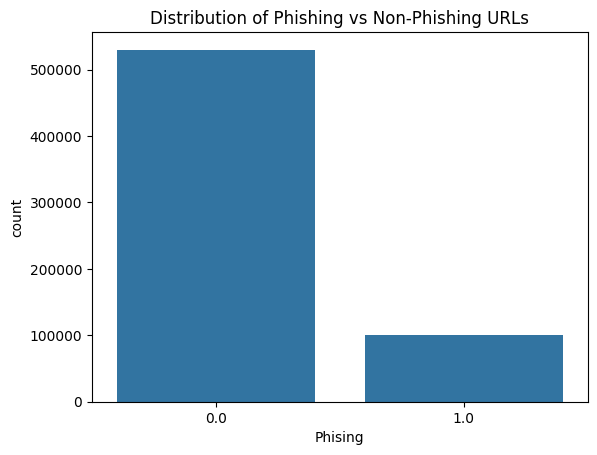

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the target variable (Phishing)
sns.countplot(x='Phising', data=df)
plt.title("Distribution of Phishing vs Non-Phishing URLs")
plt.show()


- our dataset is skewed , having almost80% data as non phisisng links.
-  we decided to process with this data because it is balnce of detecting anolomy and traditionall classifications problems.

### Handling colums with high  Standard Deviation 


1. URLlength

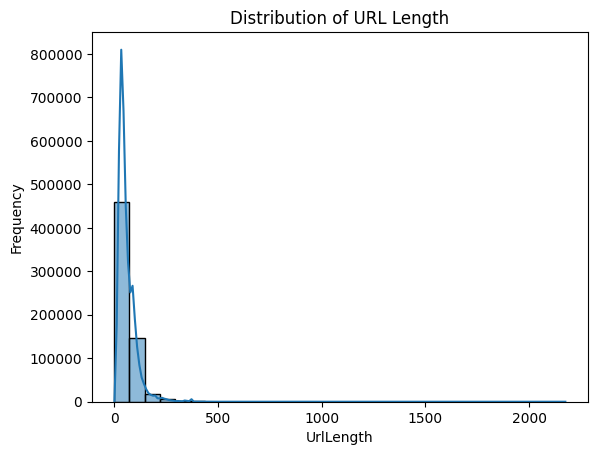

In [7]:
# Handling colums with high  Standard Deviation 
sns.histplot(df['UrlLength'], bins=30, kde=True)
plt.title("Distribution of URL Length")
plt.xlabel("UrlLength")
plt.ylabel("Frequency")
plt.show()



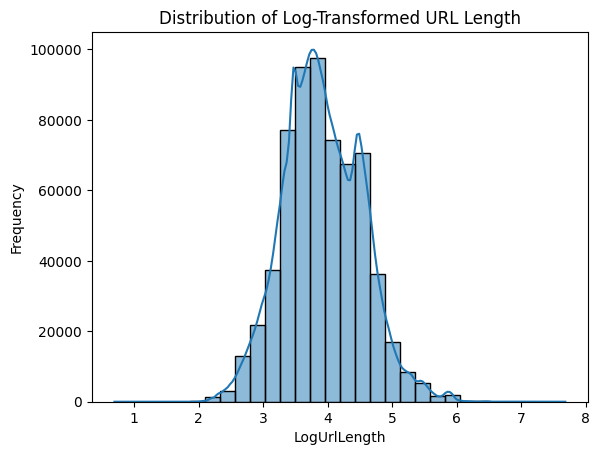

In [8]:
# outlier values seams like genuine entry so nstead of removing them we will transform them.
# aplying log transformation : 
import numpy as np

# Log transform (add a small value to avoid log(0))
df['LogUrlLength'] = np.log1p(df['UrlLength'])

# Plot the transformed distribution
sns.histplot(df['LogUrlLength'], bins=30, kde=True)
plt.title("Distribution of Log-Transformed URL Length")
plt.xlabel("LogUrlLength")
plt.ylabel("Frequency")
plt.show()


2. PathLength 

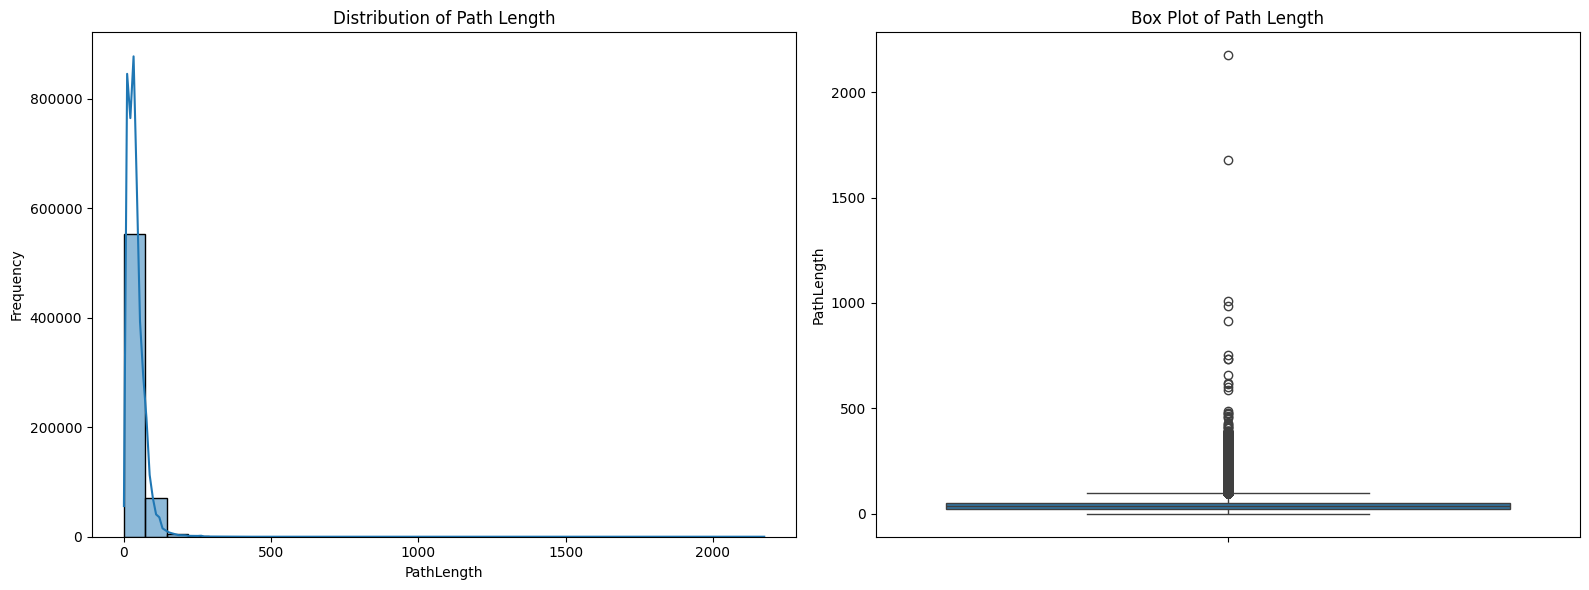

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of Path Length (Histogram)
sns.histplot(df['PathLength'], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Path Length")
axes[0].set_xlabel("PathLength")
axes[0].set_ylabel("Frequency")

# Plot 2: Box Plot of Path Length
sns.boxplot(df['PathLength'], ax=axes[1])
axes[1].set_title("Box Plot of Path Length")

plt.tight_layout()  
plt.show()


Original DataFrame shape: (630058, 13)
DataFrame shape after dropping outliers: (630058, 13)


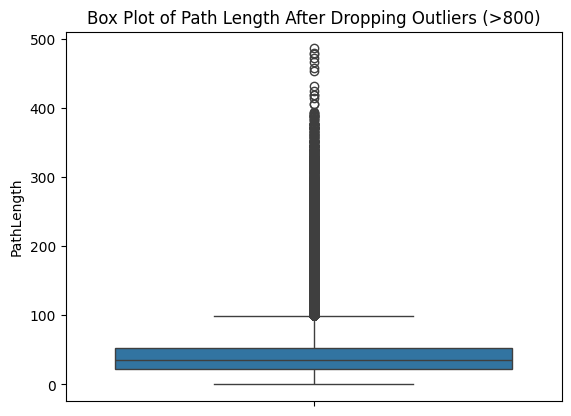

In [10]:
# Drop rows where PathLength is greater than 500
df = df[df['PathLength'] <= 500]

# Check the new shape of the DataFrame
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after dropping outliers: {df.shape}")

# Plot the new box plot for PathLength after removing outliers
sns.boxplot(df['PathLength'])
plt.title("Box Plot of Path Length After Dropping Outliers (>800)")
plt.show()


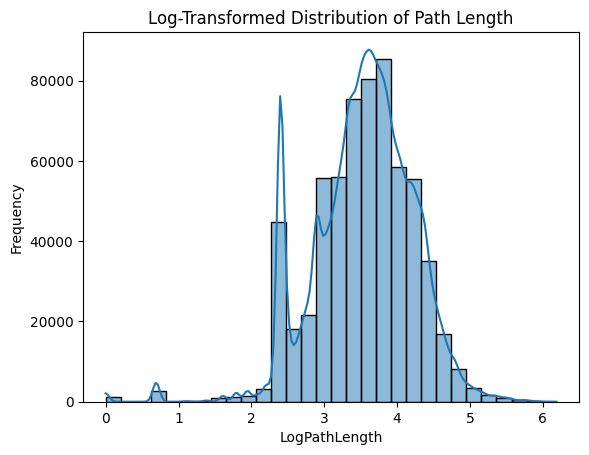

In [11]:
# as there are noticalble outliers , we will apply log transformationg for the column.

# Log transformation (adding 1 to avoid log(0))
df['LogPathLength'] = np.log1p(df['PathLength'])

# Plot the transformed distribution
sns.histplot(df['LogPathLength'], bins=30, kde=True)
plt.title("Log-Transformed Distribution of Path Length")
plt.xlabel("LogPathLength")
plt.ylabel("Frequency")
plt.show()



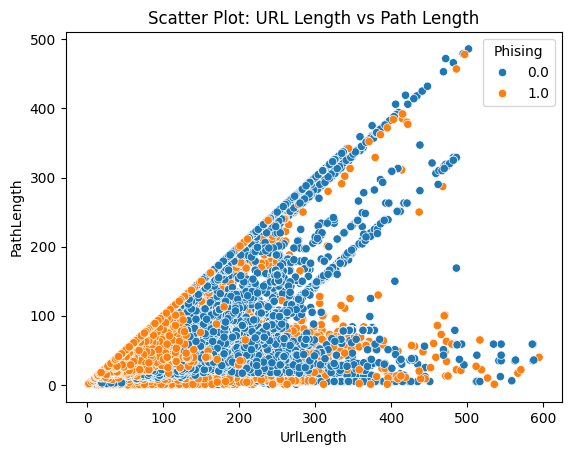

In [12]:
# Remove rows where UrlLength is greater than 1000
df= df[df['UrlLength'] <= 600]

# Scatter plot between two numerical variables (example: UrlLength vs PathLength)
sns.scatterplot(x='UrlLength', y='PathLength', hue='Phising', data=df)
plt.title("Scatter Plot: URL Length vs Path Length")
plt.xlabel("UrlLength")
plt.ylabel("PathLength")
plt.show()



### Identifying linear relations between any columns using a correlation plot

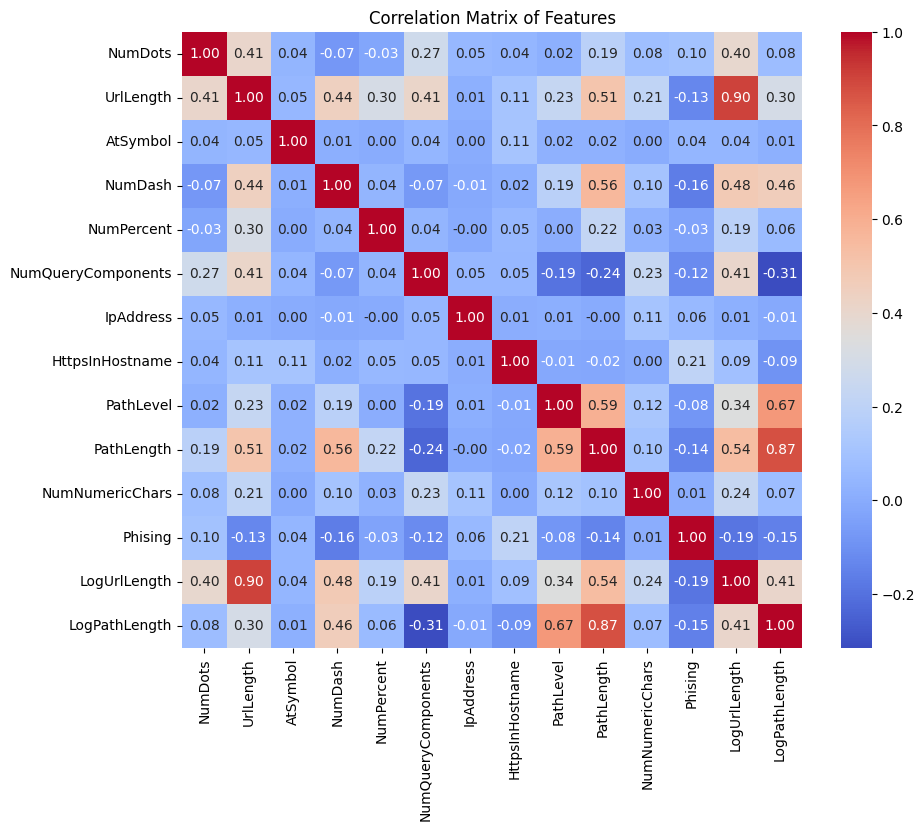

In [13]:
# Correlation matrix to check the relationships between features
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.show()




# conclusion from corelation plot :
 - Features like NumDots, UrlLength, and others have relatively small correlation values with the Phishing label, ranging between -0.16 to 0.21. This indicates that none of these individual features have a very strong linear relationship with phishin
- Features with small negative correlations (e.g., -0.16, -0.14) indicate weak negative relationships with the target, meaning that as these feature values increase, the likelihood of phishing decreases slightly.
- The weak correlations imply that we might need to either engineer new features, combine existing features, or use non-linear models to detect phishing more accurately.

# Applying Machine Learning model 



### split the Dataset into Training and Testing Sets

In [14]:
model_results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': []
}

In [15]:

from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop(columns=['Phising'])  # target variable 
y = df['Phising']

# Split the data into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)





### Models that require scaling

### Logistic Regression 

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with more iterations
log_reg = LogisticRegression(max_iter=500,class_weight='balanced')  # Increase max_iter if necessary
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)

# Append results
model_results['Model'].append('Logistic Regression')
model_results['Accuracy'].append(accuracy)
model_results['Precision'].append(precision)
model_results['Recall'].append(recall)

print(f"Logistic Regression - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Logistic Regression - Accuracy: 0.6996047430830039, Precision: 0.32119293746828004, Recall: 0.8017402320309375


### K-Nearest Neighbors (KNN) 

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)

# Append results
model_results['Model'].append('K-Nearest Neighbors')
model_results['Accuracy'].append(accuracy)
model_results['Precision'].append(precision)
model_results['Recall'].append(recall)

print(f"K-Nearest Neighbors - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


K-Nearest Neighbors - Accuracy: 0.8840738447862596, Precision: 0.6758272818193678, Recall: 0.5181357514335244


### Naive Bayes 

In [18]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)

# Append results
model_results['Model'].append('Naive Bayes')
model_results['Accuracy'].append(accuracy)
model_results['Precision'].append(precision)
model_results['Recall'].append(recall)

print(f"Naive Bayes - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Naive Bayes - Accuracy: 0.8495060611351863, Precision: 0.6501739466563587, Recall: 0.11214828643819176


### Models that don't require scaling

### Decision Tree Classifier 

In [19]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)

# Append results
model_results['Model'].append('Decision Tree')
model_results['Accuracy'].append(accuracy)
model_results['Precision'].append(precision)
model_results['Recall'].append(recall)

print(f"Decision Tree - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Decision Tree - Accuracy: 0.8905238873808806, Precision: 0.7280211702440459, Recall: 0.4952660354713962


### Random Forest Classifier 

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced') # to handle the imbalance of the data distribuation.
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)

# Append results
model_results['Model'].append('Random Forest')
model_results['Accuracy'].append(accuracy)
model_results['Precision'].append(precision)
model_results['Recall'].append(recall)

print(f"Random Forest - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")


Random Forest - Accuracy: 0.8298543316877524, Precision: 0.4789744188762995, Recall: 0.8202093612481665


# Examining results 

In [21]:
import pandas as pd

# Convert results dictionary to a DataFrame
results_df = pd.DataFrame(model_results)

# Display the results
print(results_df)


                 Model  Accuracy  Precision    Recall
0  Logistic Regression  0.849548   0.666241  0.104347
1  K-Nearest Neighbors  0.884074   0.675827  0.518136
2          Naive Bayes  0.849506   0.650174  0.112148
3        Decision Tree  0.890524   0.728021  0.495266
4        Random Forest  0.894842   0.751541  0.504101


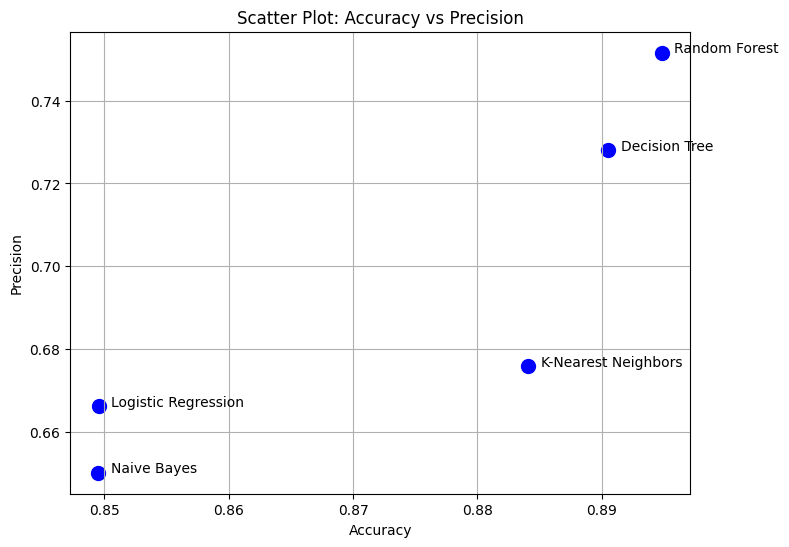

In [22]:
# Plot a scatter plot between Accuracy and Precision for each model

plt.figure(figsize=(8, 6))

# Scatter plot for Accuracy vs Precision
plt.scatter(results_df['Accuracy'], results_df['Precision'], color='blue', s=100)

# Annotate each point with the model name
for i, model in enumerate(results_df['Model']):
    plt.text(results_df['Accuracy'][i] + 0.001, results_df['Precision'][i], model, fontsize=10)

plt.title('Scatter Plot: Accuracy vs Precision')
plt.xlabel('Accuracy')
plt.ylabel('Precision')

plt.grid(True)
plt.show()


- Random Forest is the best performer, excelling in both accuracy and precision.
- Decision Tree and KNN are good alternatives, with KNN achieving higher accuracy but lower precision.
- Logistic Regression and Naive Bayes have lower performance in both metrics, with Naive Bayes being the weakest of the models.

# Evaluating Random forest 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predictions on the test set
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print train and test accuracies
print(f"Random Forest Train Accuracy: {train_accuracy}")
print(f"Random Forest Test Accuracy: {test_accuracy}")

# Print classification report for test set
print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))




Random Forest Train Accuracy: 0.913253979232477
Random Forest Test Accuracy: 0.894825679529713
Test Set Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.97      0.94    158995
         1.0       0.75      0.51      0.60     29996

    accuracy                           0.89    188991
   macro avg       0.83      0.74      0.77    188991
weighted avg       0.89      0.89      0.89    188991



- since training accuracy is almost similar to testing accuracy , model is not over fitted or under fitted. 

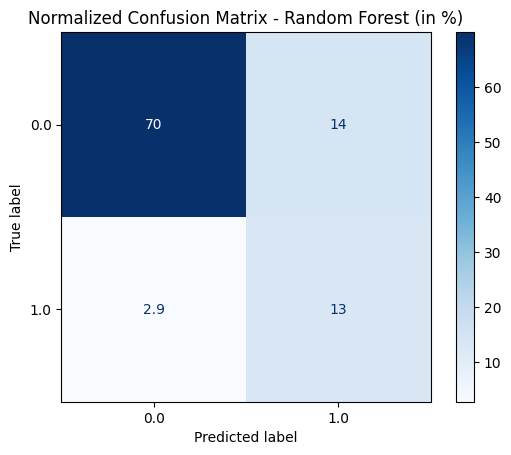

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Normalize the confusion matrix by dividing each value by the sum of all values
cm_normalized = cm.astype('float') / cm.sum() * 100

# Plot the normalized confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Confusion Matrix - Random Forest (in %)')
plt.show()


### explanation : 
* True Predections : 
- 70% of the total predictions are correctly classified as non-phishing URLs (true negatives).
- 13% of the total predictions are correctly classified phishing URLs (true positives).

* False Predections : 
- 14% of the total predictions are phishing URLs that were incorrectly classified as non-phishing (false positives).
- 2.9% of the total predictions are non-phishing URLs that were incorrectly classified as phishing (false negatives).

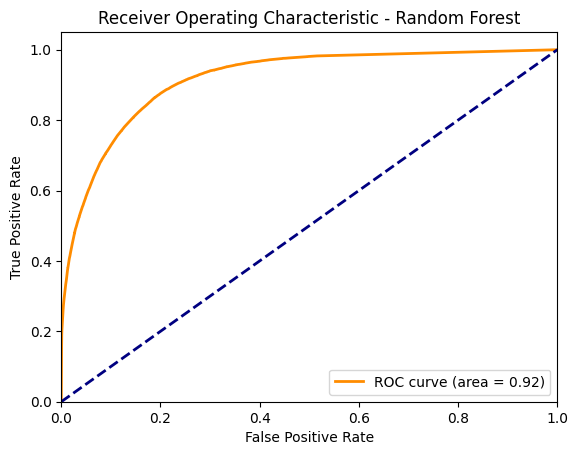

In [43]:
# roc curve :
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc='lower right')
plt.show()


### Explanation 
- The ROC curve is a graphical representation of the model's ability to distinguish between the classes (phishing vs. non-phishing). 
-  The ROC curve for your Random Forest model is significantly above the diagonal line, indicating that our model is much better than random guessing at distinguishing between phishing and non-phishing URLs.
- An AUC of 0.91 means that the model has a very good ability to distinguish between the two classes. 

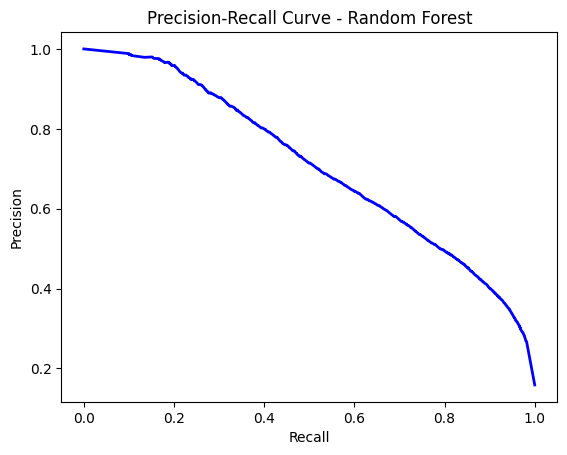

In [42]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')
plt.show()


- As the model becomes better at finding more phishing URLs (increasing recall), it starts to make more mistakes by incorrectly labeling safe URLs as phishing (decreasing precision). This means the model is catching more of the phishing URLs, but at the cost of also wrongly predicting some safe URLs as phishing.

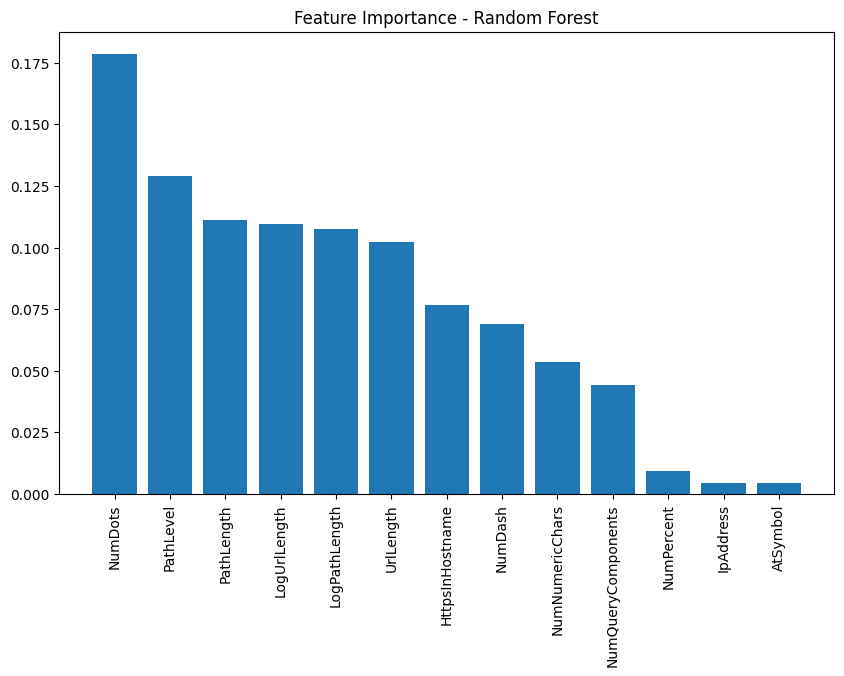

In [41]:
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance - Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


- numDots , pathlevel , pathLength , url length are one of the most important features to idenify the phising urls 